# PART 1

In [1]:
import pandas as pd

In [2]:
# Define the file names
file_names = ['DOW', 'ETSY', 'K', 'VRTX', 'XEL']

# Use a dictionary comprehension to read each file and store it in a dataframe
dataframes = {name: pd.read_csv(f'data/{name}.csv') for name in file_names}

In [5]:
# Iterate over the dataframes
for name, df in dataframes.items():
    # Check if 'Close' and 'Adj Close' are equal
    if df['Close'].equals(df['Adj Close']):
        print(f"The 'Close' and 'Adj Close' fields in the {name} data are the same.")
    else:
        print(f"The 'Close' and 'Adj Close' fields in the {name} data are different.")


The 'Close' and 'Adj Close' fields in the DOW data are different.
The 'Close' and 'Adj Close' fields in the ETSY data are the same.
The 'Close' and 'Adj Close' fields in the K data are different.
The 'Close' and 'Adj Close' fields in the VRTX data are the same.
The 'Close' and 'Adj Close' fields in the XEL data are different.


From a financial point of view, if the "Close" price and the "Adjusted Close" price are the same, it typically indicates that there were no adjustments made to the closing price of the stock.

The "Adjusted Close" price accounts for any corporate actions or events that may affect the stock price, such as stock splits, dividends, or mergers. When there is no difference between the "Close" and "Adjusted Close" prices, it suggests that there were no such events impacting the stock during the specified period.

For investors and traders, this alignment between the two prices means that there are no additional factors to consider when analyzing the stock's performance for that particular day. It simplifies the process of tracking the stock's price movements and removes the need to adjust for any corporate actions that could distort the true performance of the stock.

To conclude, when the "Close" price and the "Adjusted Close" price are the same, it signifies a straightforward trading day without any significant corporate events affecting the stock's price.

In [6]:
# Iterate over the dataframes
for name, df in dataframes.items():
    # Find the highest and lowest 'Adj Close' price
    highest = df['Adj Close'].max()
    lowest = df['Adj Close'].min()
    print(f"For {name}, the highest 'Adj Close' price was {highest} and the lowest 'Adj Close' price was {lowest}.")

For DOW, the highest 'Adj Close' price was 70.61000061035156 and the lowest 'Adj Close' price was 19.87366104125977.
For ETSY, the highest 'Adj Close' price was 296.9100036621094 and the lowest 'Adj Close' price was 16.31999969482422.
For K, the highest 'Adj Close' price was 76.81999969482422 and the lowest 'Adj Close' price was 46.663204193115234.
For VRTX, the highest 'Adj Close' price was 314.20001220703125 and the lowest 'Adj Close' price was 137.27999877929688.
For XEL, the highest 'Adj Close' price was 77.41000366210938 and the lowest 'Adj Close' price was 38.39510726928711.


In [7]:
import numpy as np

In [8]:
# Iterate over the dataframes
for name, df in dataframes.items():
    # Calculate the logarithmic returns
    df['Log Returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    
    # Calculate the min, max, mean, and median of the return distribution
    min_return = df['Log Returns'].min()
    max_return = df['Log Returns'].max()
    mean_return = df['Log Returns'].mean()
    median_return = df['Log Returns'].median()
    
    print(f"For {name}, the min return was {min_return}, the max return was {max_return}, the mean return was {mean_return}, and the median return was {median_return}.")

For DOW, the min return was -0.24408221240595074, the max return was 0.18986873645149538, the mean return was 0.00024620367109175824, and the median return was 0.00016392736053328814.
For ETSY, the min return was -0.18808053648051026, the max return was 0.23309686913006253, the mean return was 0.0015405975503614896, and the median return was 0.0013900879444659635.
For K, the min return was -0.115628284743573, the max return was 0.10116379270771704, the mean return was 0.0001906013178990866, and the median return was 0.0009463890415078971.
For VRTX, the min return was -0.23187526664382624, the max return was 0.1411250203682771, the mean return was 0.0005705454318980661, and the median return was 0.000652649027567398.
For XEL, the min return was -0.13572644184534152, the max return was 0.10667904286581054, the mean return was 0.00031160282444305675, and the median return was 0.0006350012197592398.


In [21]:
# Iterate over the dataframes
for name, df in dataframes.items():
    # Find the index of the highest gain and highest loss
    idx_highest_gain = df['Log Returns'].idxmax()
    idx_highest_loss = df['Log Returns'].idxmin()

    # Look up the corresponding dates and convert them to datetime
    date_highest_gain = pd.to_datetime(df.loc[idx_highest_gain, 'Date']).strftime('%Y-%m-%d')
    date_highest_loss = pd.to_datetime(df.loc[idx_highest_loss, 'Date']).strftime('%Y-%m-%d')

    print(f"For {name}, the highest gain was on {date_highest_gain} and the highest loss was on {date_highest_loss}.")

For DOW, the highest gain was on 2020-03-17 and the highest loss was on 2020-03-09.
For ETSY, the highest gain was on 2018-06-14 and the highest loss was on 2020-11-09.
For K, the highest gain was on 2020-03-17 and the highest loss was on 2020-03-19.
For VRTX, the highest gain was on 2018-06-29 and the highest loss was on 2020-10-15.
For XEL, the highest gain was on 2020-03-17 and the highest loss was on 2020-03-20.


In [22]:
# Iterate over the dataframes
for name, df in dataframes.items():
    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Resample to weekly frequency and calculate the mean of the 'Volume' column
    weekly_avg_volume = df['Volume'].resample('W').mean()
    
    print(f"For {name}, the average calendar weekly volume is {weekly_avg_volume.mean()}.")


For DOW, the average calendar weekly volume is 5211920.6020942405.
For ETSY, the average calendar weekly volume is 3200412.969348659.
For K, the average calendar weekly volume is 2449937.490421456.
For VRTX, the average calendar weekly volume is 1633372.3563218392.
For XEL, the average calendar weekly volume is 3228565.30651341.


In [23]:
total_returns = {}
for name, df in dataframes.items():
    total_return = (df['Adj Close'].iloc[-1] / df['Adj Close'].iloc[0] - 1) * 100
    total_returns[name] = total_return
    print(f"The total return for {name} over the entire period is {total_return}%.")

# Find the stock with the highest total return
highest_return_stock = max(total_returns, key=total_returns.get)
print(f"\nThe stock with the highest total return over the entire period is {highest_return_stock} with a return of {total_returns[highest_return_stock]}%.")


The total return for DOW over the entire period is 25.452069220874773%.
The total return for ETSY over the entire period is 594.5345467813062%.
The total return for K over the entire period is 27.096500439886583%.
The total return for VRTX over the entire period is 104.86388722988913%.
The total return for XEL over the entire period is 47.993231430034825%.

The stock with the highest total return over the entire period is ETSY with a return of 594.5345467813062%.


In [24]:
import matplotlib.pyplot as plt

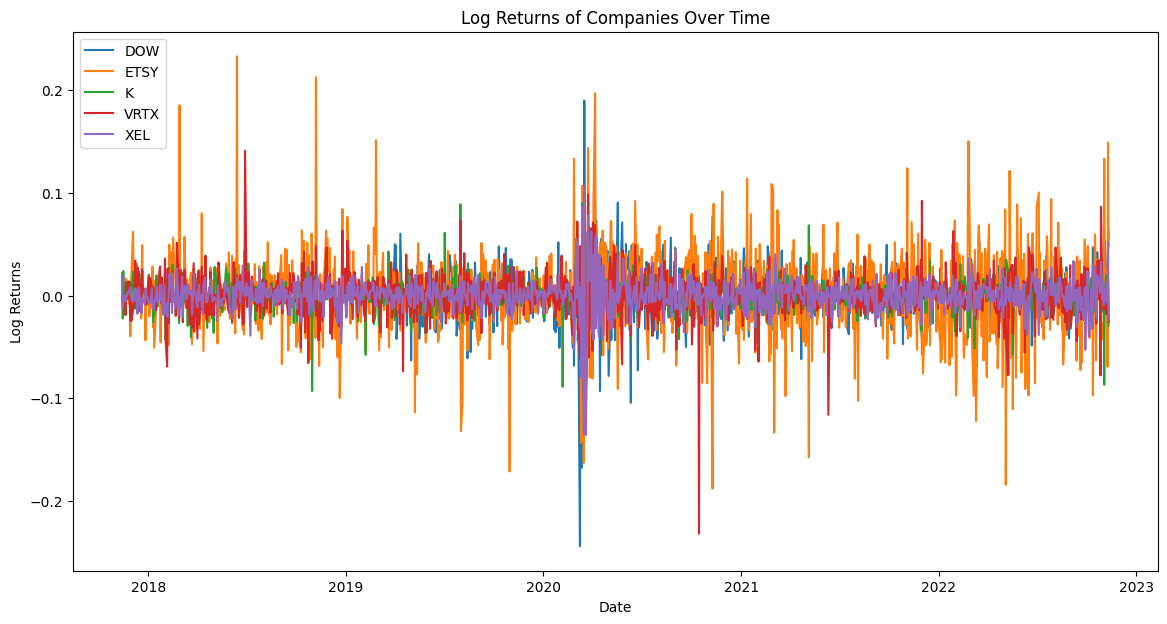

In [25]:
# Create a new figure
plt.figure(figsize=(14, 7))

# Iterate over the dataframes
for name, df in dataframes.items():
    # Plot the 'Log Returns'
    plt.plot(df.index, df['Log Returns'], label=name)

# Set the title and labels
plt.title('Log Returns of Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')

# Show the legend
plt.legend()

# Show the plot
plt.show()

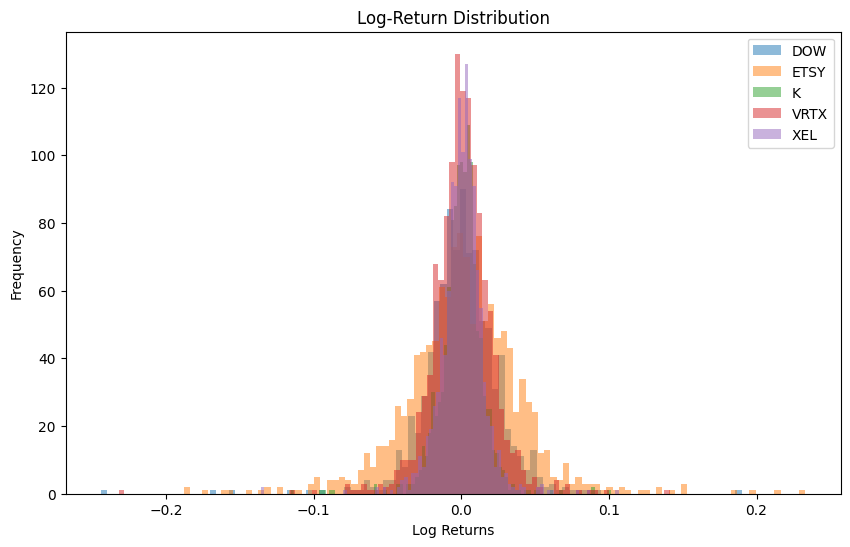

In [26]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Iterate over the dataframes
for name, df in dataframes.items():
    # Plot the histogram of the 'Log Returns'
    plt.hist(df['Log Returns'].dropna(), bins=100, label=name, alpha=0.5)

# Set the title and labels
plt.title('Log-Return Distribution')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Show the plot
plt.show()


# PART 2

In [28]:
url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
companies_df = pd.read_csv(url)

In [29]:
companies_df.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [30]:
empty_included_count = companies_df['included'].isna().sum()
print(f"The number of symbols with empty 'included' data is {empty_included_count}.")


The number of symbols with empty 'included' data is 45.


In [42]:
# Convert the 'included' column to datetime format, errors='coerce' will convert invalid dates to NaT
companies_df_clean.loc[:, 'included_datetime'] = pd.to_datetime(companies_df_clean['included'], format='%d.%m.%Y', errors='coerce')

# Remove rows where 'included_datetime' is NaT
companies_df_clean = companies_df_clean.dropna(subset=['included_datetime'])

In [43]:
companies_df_clean.head()

,Symbol,Security,GICS_Sector,hq,included,Founded,included_datetime
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902,1976-08-09
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916,2017-07-26
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888,1964-03-31
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888),2012-12-31
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981,2018-05-31


In [46]:
# Calculate the oldest and youngest company
oldest_company = companies_df_clean.loc[companies_df_clean['Age'].idxmax()]
youngest_company = companies_df_clean.loc[companies_df_clean['Age'].idxmin()]

# Calculate the average age of a constituent
average_age = companies_df_clean['Age'].mean()

# Print the results
print(f"The oldest company is {oldest_company['Security']} with an age of {oldest_company['Age']} years.")
print(f"The youngest company is {youngest_company['Security']} with an age of {youngest_company['Age']} years.")
print(f"The average age of a constituent in the sample is {average_age} years.")


The oldest company is BNY Mellon with an age of 240 years.
The youngest company is Warner Bros. Discovery with an age of 2 years.
The average age of a constituent in the sample is 70.22673031026252 years.


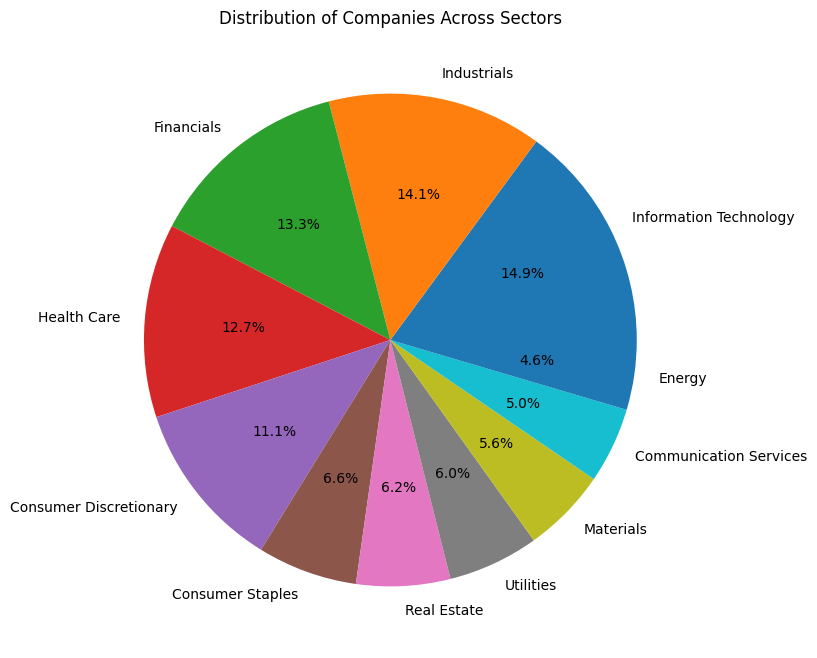

In [47]:
import matplotlib.pyplot as plt

# Count the number of companies in each sector
sector_counts = companies_df['GICS_Sector'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Companies Across Sectors')
plt.show()

In [48]:
# Extract state from 'hq' column
companies_df_clean['State'] = companies_df_clean['hq'].str.split(',').str[-1].str.strip()

# Describe the distribution of the states
state_distribution = companies_df_clean['State'].value_counts()
state_distribution


State
California                    62
Texas                         38
New York                      36
Illinois                      28
Massachusetts                 17
Pennsylvania                  17
Georgia                       16
Ohio                          16
New Jersey                    15
Minnesota                     13
North Carolina                13
Virginia                      13
Washington                    12
Connecticut                   11
Florida                       10
Michigan                      10
Tennessee                      8
Colorado                       7
Ireland                        7
Missouri                       6
Wisconsin                      6
Indiana                        5
Maryland                       5
Oklahoma                       4
Nevada                         4
Rhode Island                   4
Arizona                        4
Switzerland                    3
United Kingdom                 3
Arkansas                       3
Loui

In [52]:
# Load the new dataset
subindustry_df = pd.read_csv('https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv')

# Join the two datasets
merged_df = pd.merge(companies_df_clean, subindustry_df, on='Symbol', how='inner')

# Filter the data for the "Consumer Discretionary" GICS sector
consumer_discretionary_df = merged_df[merged_df['GICS_Sector'] == 'Consumer Discretionary']

# Get the distribution of subindustries
subindustry_distribution = consumer_discretionary_df['subindustry'].value_counts()

print(subindustry_distribution)

subindustry
Specialty Stores                       6
Restaurants                            5
Internet & Direct Marketing Retail     5
Casinos & Gaming                       4
Homebuilding                           4
General Merchandise Stores             3
Automobile Manufacturers               3
Apparel, Accessories & Luxury Goods    3
Hotels, Resorts & Cruise Lines         3
Distributors                           2
Automotive Retail                      2
Auto Parts & Equipment                 2
Apparel Retail                         2
Consumer Electronics                   1
Leisure Products                       1
Home Improvement Retail                1
Computer & Electronics Retail          1
Home Furnishings                       1
Housewares & Specialties               1
Name: count, dtype: int64
